
# 🌼 자연어처리 기초 - 3차시(24.11.12)

---


## 1. 활성화함수
- 순전파 : 입력값이 들어오면 여러 개의 은닉층을 순서대로 거쳐 결과값을 내는 과정
- 역전파 : 계산 결과와 정답의 오차를 구해 이 오차에 관여하는 값들의 가중치를 수정하여 오차가 작아지는 방향으로 일정 횟수를 반복해 수정하는 방법

1. Sigmoid
- x값이 점점 큰 값이 되면 미분했을 때 0이 되어 역전파를 적용했을 때 더이상 학습을 안하기 때문에 잘 쓰지않음(기울기소실)
2. Hyperbolic tangent
- 입력값을 -1과 1사이의 값으로 변환, 시그모이드 함수와 같은 문제가 발생(기울기소실)
3. ReLU
- 미분을 하게 되면 0과 1이 되어 1값을 넣을 수 있어 연산이 적고 학습이 가능하기 때문에 주로 사용됨
- 입력값이 양수일 때는 x 음수일 때는 0을 출력하여 경사하강에 영향을 주지 않아 학습이 빠르다
4. leaky ReLU
- 음수값으로 가는 값들도 반영을 하기 위해 ReLU를 개선
5. Soft max
- 입력받은 값을 0~1사이에 출력이 되도록 정규화하여 출력값들의 총합이 항상 1이 된다

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def step_function(x):
    return np.array(x>0)

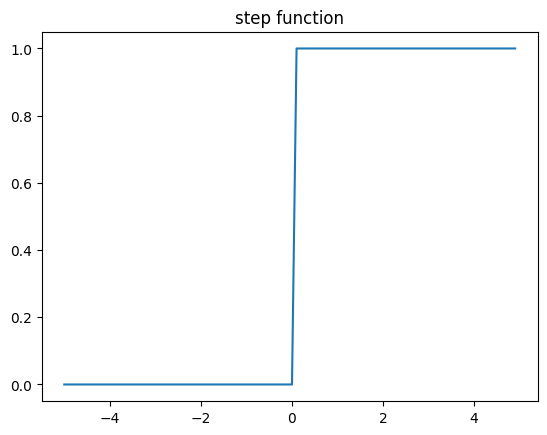

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.title('step function')
plt.plot(x,y)
plt.show()

In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

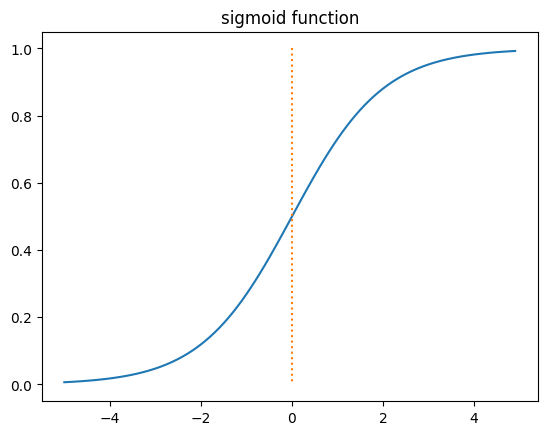

In [9]:
y = sigmoid(x)
plt.plot(x,y)
plt.plot([0,0], [1,0], ':')
plt.title('sigmoid function')
plt.show()

In [11]:
y = np.tanh(x)

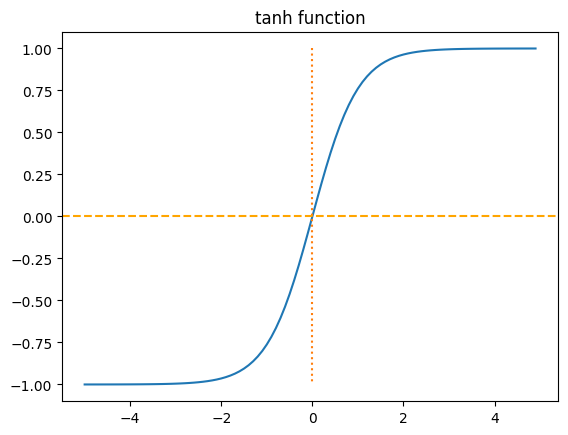

In [12]:

plt.plot(x,y)
plt.plot([0,0], [1,-1], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('tanh function')
plt.show()

In [13]:
def relu(x):
    return np.maximum(0,x)

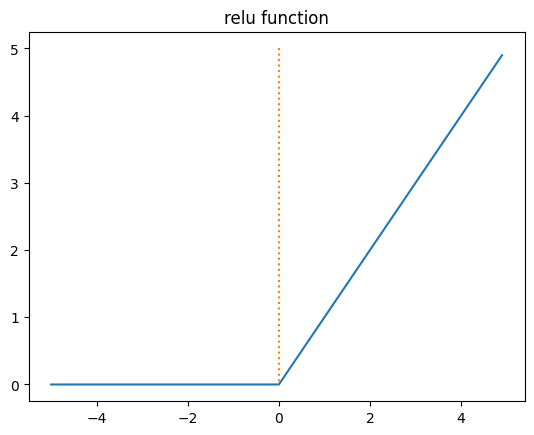

In [14]:
y = relu(x)
plt.plot(x,y)
plt.plot([0,0], [5,0], ':')
# plt.axhline(y=0, color='orange', linestyle='--')
plt.title('relu function')
plt.show()

In [15]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

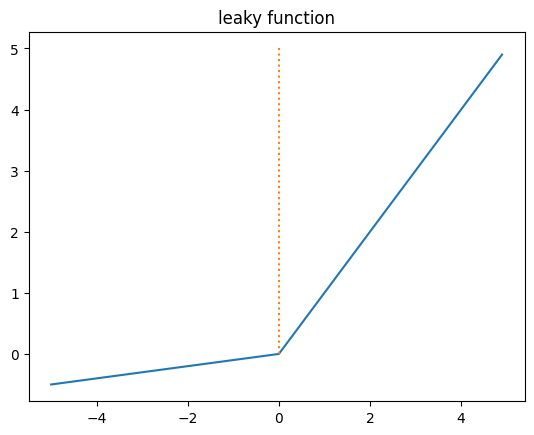

In [16]:
y = leaky_relu(x)
plt.plot(x,y)
plt.plot([0,0], [5,0], ':')
# plt.axhline(y=0, color='orange', linestyle='--')
plt.title('leaky function')
plt.show()

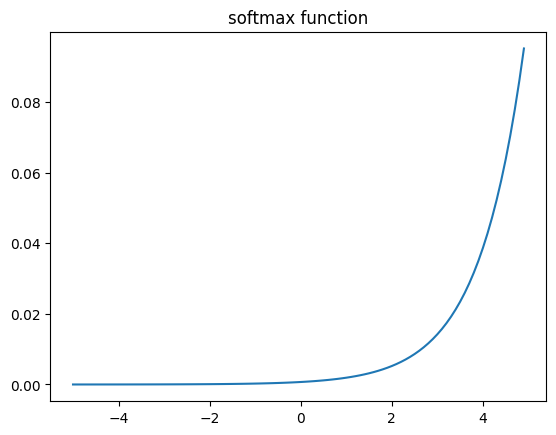

In [17]:
y = np.exp(x)/np.sum(np.exp(x))
plt.plot(x,y)
plt.title('softmax function')
plt.show()

#### 순전파

In [ ]:
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential # 껍데기
from tensorflow.keras.layers import Dense # 층

model = Sequential() # 모델의 껍데기

model.add(Dense(2, input_dim=3, activation='softmax')) # 출력차원 2차원, 입력차원 3차원, softmax함수를 사용해서 활성화


In [ ]:
model.add(Dense(8, input_dim=4, activation='relu'))  # 층층이 쌓는 법
model.add(Dense(8, activation='relu')) 
model.add(Dense(3, activation='softmax'))

In [ ]:
from tensorflow.keras import layers, models # 한번에 쌓는법

model = models.Sequential([
    layers.Dense(64, input_dim=100, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# 입력값으로 80차원을 받고, 40차원으로 줄어드는 히든레이어를 생성하고, 출력값으로 3차원을 출력하는 다중분류모델 쌓아보기

model.add(Dense(70, input_dim=80, activation='relu')) # 출력값은 뭘 넣어도 상관 없음
model.add(Dense(40,  activation='relu'))
model.add(Dense(3,  activation='softmax'))

model = models.Sequential([
    layers.Dense(60, input_dim=80, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(3, activation='softmax')
])

#### 손실함수

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# thstlfgkatn : mse, 평가지표 : mse

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])
# 위와 같은 방법, loss불러오는 형태만 다름

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# 이진분류에서 사용되는 binary_crossentropy
# 정확도를 평가지표로 사용

In [9]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])
# 위와 같은 방법

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# 다중 클래스 분류 문제에서 사용하는 categorical_crossentroopy

In [ ]:
# tf.keras.losses.CategoricalCrossentropy()

#### 과적합 막는 법

In [ ]:
from tensorflow.keras.layers import Dropout, Dense
# 드롭아웃 : 일부 뉴런을 무작위로 비활성화, 비율을 Dropout(0.3) : 30%로 설정한 예시
max_words = 10000
num_classes = 46
# 소프트맥스를 사용한 다중분류
# input_shape=(max_words,)
# input_dim= max_words

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# # 얼리스타핑 : 일정 에포크동안 loss값이 개선되지 않으면 학습을 중지하여 과적합 방지

# model = Sequential([
#     Dense(128, input_dim = 784, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# # Val_loss, val_accuracy(어떤 지표를 기준으로 모니터링 할 것인지)
# # patience (검증 손실, 검증 정확도가 개선되지 않더라도 기다려주는 에포크 수)
# # restore_best_weights(True, 학습 중단 후 가장 낮은 검증 손실이나 가장 높은 검증 정확도를 보였던 시점의 가중치로 복원)
# early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)

# # model.fit(X_train, y_train, validation_split = 0.2, epochs=100, callbacks=[early_stopping])

### tensorflow의 Tokenizer()

In [89]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = 'The earth is an awesome place live'
sub_text = 'The earth is an awesome place live'

tokenizer.fit_on_texts([train_text])
sequences = tokenizer.texts_to_sequences([sub_text])

print(f'정수 인코딩 : {sequences}') # 정수 인코딩이 1부터 시작함
print(f'단어 집합 : {tokenizer.word_index}')



정수 인코딩 : [[1, 2, 3, 4, 5, 6, 7]]
단어 집합 : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


### 딥러닝의 선형 회귀(Linear Regression)

In [32]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# 공부시간
y = [11, 22, 33, 44, 55, 66, 77, 88 , 99]
# 시험성적

linear_model = Sequential()
linear_model.add(Dense(1, input_shape = (1, ), activation = 'linear'))

sgd = optimizers.SGD(lr=0.01)
linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

linear_model.fit(X, y, epochs = 300)
y_predict = linear_model.predict(X)

Epoch 1/300


c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 318ms/step - loss: 3436.4800 - mse: 3436.4800
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 423.3100 - mse: 423.3100
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 52.5582 - mse: 52.5582
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 6.9361 - mse: 6.9361
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3188 - mse: 1.3188
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 0.6238 - mse: 0.6238
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 0.5345 - mse: 0.5345
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5198 - mse: 0.5198
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 0.5142 - mse: 0.5142
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 0.5099 - mse: 0.5099
Epoch 11/300
1/1 [==============================] - 0s 4ms/step - loss: 0.5

In [33]:
y_predict

array([[11.39509 ],
       [22.320436],
       [33.24578 ],
       [44.171127],
       [55.096474],
       [66.02182 ],
       [76.94717 ],
       [87.87251 ],
       [98.79786 ]], dtype=float32)

### 딥러닝의 로지스틱 회귀(Logistic Regression)

In [30]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

logistic_model = Sequential()
logistic_model.add(Dense(1, input_shape = (3, ), activation = 'sigmoid'))

### 딥러닝의 다층 퍼셉트론(MultiLayer Perceptron, MLP)

In [35]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나' , '저는 과일이 좋아요']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
tokenizer.word_index # 1인덱스는 가장 많이 나오거나 먼저 나오는거

{'바나나': 1,
 '먹고': 2,
 '싶은': 3,
 '사과': 4,
 '길고': 5,
 '노란': 6,
 '저는': 7,
 '과일이': 8,
 '좋아요': 9}

In [ ]:
print(tokenizer.texts_to_matrix(texts, mode = 'count')) # 9자리가 아니라 10자리인 이유는 자릿 수를 맞춰주기 위해

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [ ]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary')) # 0과 1로 존재 하는지 안하는 지

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [ ]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 중요도

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [ ]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2))
# 각 단어의 등장 횟수가 분자
# 각 문서의 크기(등장한 단어 개수)가 분모

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


#### 20개 뉴스 그룹 데이터 실습

In [18]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical


In [44]:
newsdata = fetch_20newsgroups(subset = 'train')

In [ ]:
print(newsdata.keys()) 

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [46]:
print(f'훈련용 샘플 개수 : {len(newsdata.data)}')

훈련용 샘플 개수 : 11314


In [47]:
print(f'총 주제의 개수 : {len(newsdata.target_names)}')
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [48]:
print(f'첫번째 샘플의 레이블 : {newsdata.target[0]}')

첫번째 샘플의 레이블 : 7


In [85]:
print(f'7번째 샘플의 주제 : {newsdata.target_names[7]}')

7번째 샘플의 주제 : rec.autos


In [86]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [50]:
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [53]:
print(f'중복을 제외한 샘플의 수 : {data["email"].nunique()}')
print(f'중복을 제외한 샘플의 수 : {data["target"].nunique()}')

중복을 제외한 샘플의 수 : 11314
중복을 제외한 샘플의 수 : 20


<AxesSubplot:>

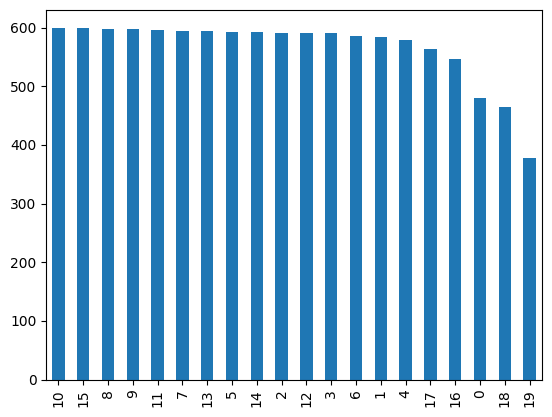

In [55]:
data['target'].value_counts().plot(kind='bar')

In [58]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [67]:
train_email = data['email']
train_label = data['target']
# email을 가지고 target을 학습할 예정
# 지금 이 데이터는 train dataset으로 불러온 것

In [60]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)

In [61]:
newsdata_test.data

['From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)\nSubject: Need info on 88-89 Bonneville\nOrganization: University at Buffalo\nLines: 10\nNews-Software: VAX/VMS VNEWS 1.41\nNntp-Posting-Host: ubvmsd.cc.buffalo.edu\n\n\n I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.\n\n\t\t\tNeil Gandler\n',
 'From: Rick Miller <rick@ee.uwm.edu>\nSubject: X-Face?\nOrganization: Just me.\nLines: 17\nDistribution: world\nNNTP-Posting-Host: 129.89.2.33\nSummary: Go ahead... swamp me.  <EEP!>\n\nI\'m not familiar at all with the format of these "X-Face:" thingies, but\nafter seeing them 

In [62]:
newsdata_test.target

array([ 7,  5,  0, ...,  9,  6, 15])

In [63]:
test_email = newsdata_test.data
test_label = newsdata_test.target

In [64]:
vocab_size = 10000
num_classes = 20

In [65]:
def prepare_data(train_data, test_data, mode):
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode)
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode)
    return X_train, X_test, tokenizer.index_word


In [68]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')

In [69]:
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

In [ ]:
print(f'train 샘플 이메일의 크기 : {X_train.shape}') 
print(f'train 샘플 라벨의 크기 : {y_train.shape}')
print(f'test  샘플 이메일의 크기 : {X_test.shape}')
print(f'test  샘플 라벨의 크기 : {y_test.shape}')

train 샘플 이메일의 크기 : (11314, 10000)
train 샘플 라벨의 크기 : (11314, 20)
test  샘플 이메일의 크기 : (7532, 10000)
test  샘플 라벨의 크기 : (7532, 20)


In [ ]:
print(index_to_word[0]) # 0번째는 패딩으로 들어간 값이라서 빈도수 기준으로 9999개의 값이 들어 있다

KeyError: 0

#### 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [82]:
# 모델을 학습하고 평가하는 함수 만들기
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_dim = vocab_size, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    model.fit(X_train,y_train, batch_size = 128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size = 128, verbose = 0)

    return score[1]

In [83]:
modes = ['binary', 'count', 'tfidf', 'freq']

In [84]:
for mode in modes:
    X_train, X_test, _ = prepare_data(train_email, test_email, mode)
    score = fit_and_evaluate(X_train, y_train, X_test, y_test)
    print(mode + '모드의 테스트 정확도 : ', score)

Epoch 1/5
80/80 [==============================] - 4s 48ms/step - loss: 2.2854 - accuracy: 0.3347 - val_loss: 0.9690 - val_accuracy: 0.8198
Epoch 2/5
80/80 [==============================] - 3s 43ms/step - loss: 0.8776 - accuracy: 0.7596 - val_loss: 0.4614 - val_accuracy: 0.8852
Epoch 3/5
80/80 [==============================] - 3s 40ms/step - loss: 0.4282 - accuracy: 0.8884 - val_loss: 0.3386 - val_accuracy: 0.8993
Epoch 4/5
80/80 [==============================] - 5s 63ms/step - loss: 0.2539 - accuracy: 0.9365 - val_loss: 0.3183 - val_accuracy: 0.9081
Epoch 5/5
80/80 [==============================] - 5s 68ms/step - loss: 0.1700 - accuracy: 0.9577 - val_loss: 0.3044 - val_accuracy: 0.9161
binary모드의 테스트 정확도 :  0.823287308216095
Epoch 1/5
80/80 [==============================] - 5s 53ms/step - loss: 2.7756 - accuracy: 0.2356 - val_loss: 1.6581 - val_accuracy: 0.7200
Epoch 2/5
80/80 [==============================] - 4s 47ms/step - loss: 1.4122 - accuracy: 0.6383 - val_loss: 0.6906 - va


## 🌼마무리 문제

아래 문제들을 풀어보세요!

Q1. 폐암 유무 분류 문제를 해결해보세요
- df=pd.read_csv('./data/질병데이터.csv')
- x값들을 통해 y값을 0과 1로 예측해보세요


Q2. 집값 데이터를 통해 회귀 문제를 해결해보세요
- df = pd.read_csv("./data/house_train.csv")
- 다양한 x값들을 통해 y값인 SalePrice를 예측해보세요

In [7]:
# Q1. 폐암 유무분류 문제
# x값들을 통해 y값을 0과 1로 예측해보세요

import pandas as pd

df=pd.read_csv('../data/질병데이터.csv')
df.head()
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      800 non-null    int64  
 1   x2      800 non-null    float64
 2   x3      800 non-null    float64
 3   x4      800 non-null    int64  
 4   x5      800 non-null    int64  
 5   x6      800 non-null    int64  
 6   x7      800 non-null    int64  
 7   x8      800 non-null    int64  
 8   x9      800 non-null    int64  
 9   x10     800 non-null    int64  
 10  x11     800 non-null    int64  
 11  x12     800 non-null    int64  
 12  x13     800 non-null    int64  
 13  x14     800 non-null    int64  
 14  x15     800 non-null    int64  
 15  x16     800 non-null    int64  
 16  y       800 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 106.4 KB


In [8]:
df['y'].value_counts()

0    400
1    400
Name: y, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:16] # 마지막 열인 y열 빼고
y = df.iloc[:, 16]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping 

model = Sequential()
model.add(Dense(30, input_dim = 16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # 1차원으로 줄여줘야 하나의 값을 결과로 받을 수 있음

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc']) # metrics : 평가지표
# patience=3 : 모델이 손실을 줄이는 데 실패하더라도 3번의 에포크는 기다린 후 학습을 중단
earlystop = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1) # 손실차이로 확인(모니터), 
hist = model.fit(X_train, y_train, epochs = 30, batch_size = 16, verbose = 2, validation_split = .2, callbacks = earlystop)

Epoch 1/30
32/32 - 0s - loss: 1.4055 - acc: 0.5098 - val_loss: 0.8120 - val_acc: 0.4688 - 449ms/epoch - 14ms/step
Epoch 2/30
32/32 - 0s - loss: 0.7298 - acc: 0.4648 - val_loss: 0.6960 - val_acc: 0.5078 - 57ms/epoch - 2ms/step
Epoch 3/30
32/32 - 0s - loss: 0.7062 - acc: 0.4785 - val_loss: 0.6839 - val_acc: 0.5234 - 52ms/epoch - 2ms/step
Epoch 4/30
32/32 - 0s - loss: 0.7023 - acc: 0.5039 - val_loss: 0.6748 - val_acc: 0.5391 - 62ms/epoch - 2ms/step
Epoch 5/30
32/32 - 0s - loss: 0.6974 - acc: 0.5215 - val_loss: 0.6671 - val_acc: 0.5781 - 56ms/epoch - 2ms/step
Epoch 6/30
32/32 - 0s - loss: 0.6894 - acc: 0.5527 - val_loss: 0.6579 - val_acc: 0.5859 - 60ms/epoch - 2ms/step
Epoch 7/30
32/32 - 0s - loss: 0.6834 - acc: 0.5684 - val_loss: 0.6662 - val_acc: 0.5625 - 67ms/epoch - 2ms/step
Epoch 8/30
32/32 - 0s - loss: 0.6799 - acc: 0.5391 - val_loss: 0.6452 - val_acc: 0.6484 - 68ms/epoch - 2ms/step
Epoch 9/30
32/32 - 0s - loss: 0.6802 - acc: 0.5918 - val_loss: 0.6423 - val_acc: 0.6406 - 53ms/epoch -

In [14]:
pred = model.predict(X_test)
pred # sigmoid 는 0과1사이의 확률을 나타내기 때문에 결과가 소수점 형태로 나타남

5/5 [==============================] - 0s 1ms/step


array([[0.56290734],
       [0.3279905 ],
       [0.41958326],
       [0.33348435],
       [0.53336704],
       [0.2906142 ],
       [0.01232027],
       [0.41893312],
       [0.36846396],
       [0.77865976],
       [0.40340638],
       [0.33444172],
       [0.6708347 ],
       [0.36049718],
       [0.33424732],
       [0.63735676],
       [0.5115206 ],
       [0.75534695],
       [0.04089065],
       [0.33348435],
       [0.22521195],
       [0.6263064 ],
       [0.5670653 ],
       [0.77865976],
       [0.54482   ],
       [0.3823332 ],
       [0.5081314 ],
       [0.5561214 ],
       [0.7727501 ],
       [0.68992597],
       [0.70016885],
       [0.4248754 ],
       [0.7727501 ],
       [0.77865976],
       [0.6524686 ],
       [0.50407064],
       [0.7526714 ],
       [0.23331474],
       [0.32612094],
       [0.6138644 ],
       [0.47029808],
       [0.5374532 ],
       [0.23699345],
       [0.5378452 ],
       [0.53155375],
       [0.59979004],
       [0.23547935],
       [0.430

In [15]:
threshold = 0.6
# 임의의 임계값 설정

binary_pred = (pred > threshold).astype(int)
binary_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [16]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
acc

5/5 [==============================] - 0s 997us/step - loss: 0.5855 - acc: 0.7250


0.7250000238418579

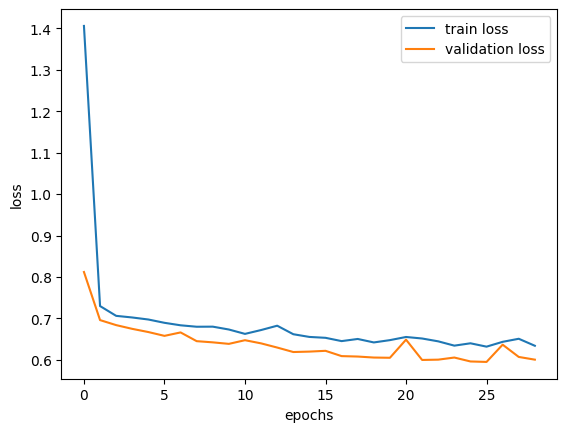

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

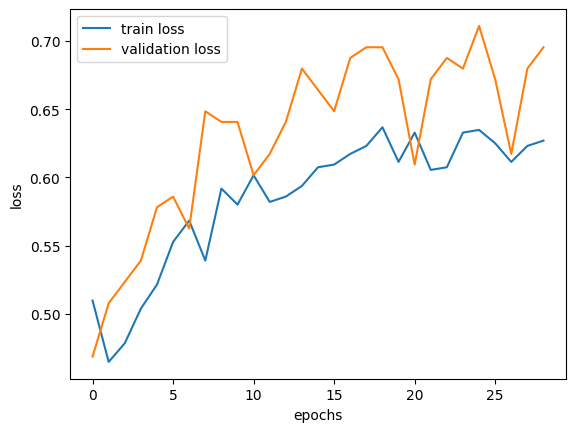

In [24]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'], label = 'train loss')
plt.plot(hist.history['val_acc'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
# Q2 집값 데이터를 통해 회귀 문제를 해결해 보세요

df2 = pd.read_csv('../data/house_train.csv')
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
# 전처리는 건너뜀

df = pd.get_dummies(df2)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [30]:
df = df.fillna(df.mean())
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [31]:
df_corr = df.corr()
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [34]:
df_corr_sort = df_corr.sort_values('SalePrice', ascending = False)
df_corr_sort

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SalePrice,-0.021917,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,...,-0.027475,0.357509,-0.034895,-0.242598,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
GrLivArea,0.008273,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,...,-0.022348,0.168368,-0.036522,-0.121102,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239
GarageCars,0.016570,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,...,-0.044502,0.286290,-0.087089,-0.197458,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164
GarageArea,0.017634,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,...,-0.041904,0.296671,-0.080601,-0.218665,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MasVnrType_None,0.024897,-0.023867,-0.121677,-0.032418,-0.397955,0.160227,-0.426399,-0.240784,-0.684299,-0.235217,...,0.024834,-0.172209,0.037687,0.132540,0.039705,0.016873,0.013870,-0.010018,0.094590,-0.169202
GarageFinish_Unf,-0.007513,-0.008807,-0.188336,-0.068099,-0.422479,0.203629,-0.523233,-0.414376,-0.222367,-0.179000,...,-0.001712,-0.238934,-0.007466,0.172316,0.039162,-0.017490,0.062021,0.044406,0.118008,-0.232554
BsmtQual_TA,0.033795,-0.138741,-0.066531,-0.044874,-0.497957,0.280779,-0.631734,-0.495485,-0.187406,-0.121785,...,0.018342,-0.265143,-0.010153,0.161940,0.103767,0.005852,-0.050903,0.060591,0.113021,-0.258953
KitchenQual_TA,-0.014973,-0.010836,-0.136764,-0.031154,-0.553891,0.046947,-0.459792,-0.576964,-0.195807,-0.108876,...,-0.012126,-0.274335,0.045067,0.178612,0.065613,0.025849,0.060068,0.034549,0.128151,-0.273826


In [35]:
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [36]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,7,1710,2,548,856
1,6,1262,2,460,1262
2,7,1786,2,608,920
3,7,1717,3,642,756
4,8,2198,3,836,1145
...,...,...,...,...,...
1455,6,1647,2,460,953
1456,6,2073,2,500,1542
1457,7,2340,1,252,1152
1458,5,1078,1,240,1078


In [37]:
y = df['SalePrice'].values # y값은 values값 형태로 넣어줌
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# 데이터셋 나누기

In [44]:
# 모델 쌓기
model = Sequential()
model.add(Dense(10, input_dim = 5, activation = 'relu'))
# 히든 레이어 쌓기
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1, activation = 'linear')) # linear함수는 생략가능 기본값

model.compile(optimizer = 'adam', loss='mse', metrics=['mse'])
early_stopping = EarlyStopping(monitor = 'val_mse', patience = 20, verbose = 1)

hist2 = model.fit(X_train, y_train, validation_split = 0.2, epochs= 200, batch_size=20, callbacks = early_stopping) # 배치 사이즈가 너무 크가나 작으면 분석이 잘 안 될 수 있음
# 모델 학습.....


Epoch 1/200
47/47 [==============================] - 1s 6ms/step - loss: 40733696000.0000 - mse: 40733696000.0000 - val_loss: 33080524800.0000 - val_mse: 33080524800.0000
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 38792499200.0000 - mse: 38792499200.0000 - val_loss: 30192615424.0000 - val_mse: 30192615424.0000
Epoch 3/200
47/47 [==============================] - 0s 2ms/step - loss: 32755062784.0000 - mse: 32755062784.0000 - val_loss: 22079772672.0000 - val_mse: 22079772672.0000
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 19504979968.0000 - mse: 19504979968.0000 - val_loss: 8876515328.0000 - val_mse: 8876515328.0000
Epoch 5/200
47/47 [==============================] - 0s 2ms/step - loss: 5577987584.0000 - mse: 5577987584.0000 - val_loss: 3028103168.0000 - val_mse: 3028103168.0000
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 2310879488.0000 - mse: 2310879488.0000 - val_loss: 3227215104.0000 - val_mse: 

In [45]:
y_pred = model.predict(X_test)
y_pred # 주택가격 출력

10/10 [==============================] - 0s 776us/step


array([[137494.78 ],
       [262647.9  ],
       [186079.9  ],
       [223407.88 ],
       [155757.97 ],
       [148920.16 ],
       [155651.06 ],
       [200941.69 ],
       [159641.39 ],
       [119753.73 ],
       [194214.69 ],
       [161895.   ],
       [151030.36 ],
       [171406.39 ],
       [199972.7  ],
       [178423.56 ],
       [197016.22 ],
       [133251.39 ],
       [156063.75 ],
       [151028.22 ],
       [169681.3  ],
       [ 93642.34 ],
       [135771.02 ],
       [252710.   ],
       [ 78641.3  ],
       [163161.34 ],
       [215785.69 ],
       [244317.6  ],
       [223981.44 ],
       [279118.12 ],
       [ 68694.24 ],
       [128904.836],
       [238921.84 ],
       [161607.88 ],
       [259990.12 ],
       [194990.53 ],
       [105341.07 ],
       [167948.06 ],
       [175364.84 ],
       [294121.1  ],
       [222623.7  ],
       [266571.4  ],
       [206361.78 ],
       [169121.31 ],
       [138743.58 ],
       [132614.77 ],
       [165897.22 ],
       [10448

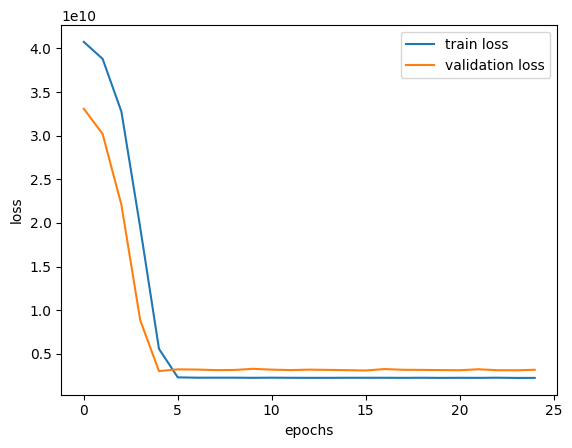

In [46]:
# loss 값 시각화
plt.plot(hist2.history['loss'], label = 'train loss')
plt.plot(hist2.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs') # 학습의 수
plt.ylabel('loss') # 손실 값
plt.legend()
plt.show()

In [47]:
real_price = []
pred_price = []
result = []

count = 0 # for 문을 위한 초기화

for i in range(10):
    real = y_test[i]
    pred = y_pred[i][0] # array가 2차원이기 때문에 1차원으로 접근 X
    print(f'실제가격 : {real:.2f}, 예측가격 : {pred:.2f}')
    real_price.append(real)
    pred_price.append(pred)
    # 시각화를 위한 저장
    count += 1
    result.append(count)




실제가격 : 154900.00, 예측가격 : 137494.78
실제가격 : 297000.00, 예측가격 : 262647.91
실제가격 : 227000.00, 예측가격 : 186079.91
실제가격 : 239000.00, 예측가격 : 223407.88
실제가격 : 125000.00, 예측가격 : 155757.97
실제가격 : 113000.00, 예측가격 : 148920.16
실제가격 : 158000.00, 예측가격 : 155651.06
실제가격 : 213500.00, 예측가격 : 200941.69
실제가격 : 188500.00, 예측가격 : 159641.39
실제가격 : 133900.00, 예측가격 : 119753.73


c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) mis

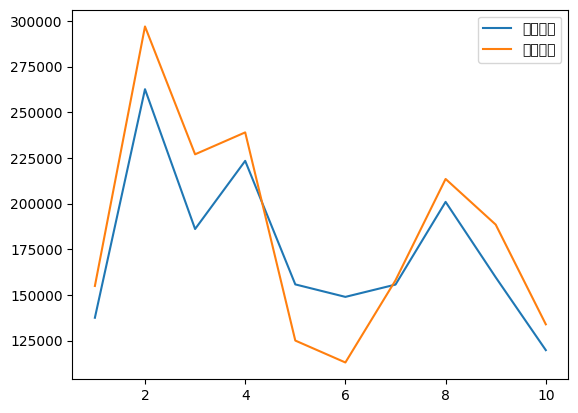

In [ ]:
plt.plot(result, pred_price, label = '예측가격')
plt.plot(result, real_price, label = '실제가격')
plt.legend()
plt.show()
